# Analysis of krisha.kz

(Bavarkhan Yesbol BDA 1904)

Technology stacks : python3, GoogleColab, selenium, BeautifulSoup [Текст ссылки](https://)

krisha.kz is a permanent access to an up-to-date database of advertisements for the sale, purchase, rent of apartments, houses, summer cottages, land plots in cities and villages of Kazakhstan, as well as information on any types of commercial real estate. All ads indicate the price of the object, which is very important for analyzing a specific situation.


Taking data from Krisha kz region Pavlodar

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


In [ ]:
url_of_region = 'https://krisha.kz/prodazha/kvartiry/pavlodarskaja-oblast/'

In [ ]:
from bs4 import BeautifulSoup
import requests
from pprint import pprint

page = requests.get(url_of_region)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
nav = soup.findAll('nav',{'class':"paginator"})
a = nav[0].findAll('a', {'class':'paginator__btn'})
last_page = int(a[-2].get('data-page'))
print(last_page)

142


In [ ]:
all_data = []
for i in range(1, last_page+1):
    wd.get('http://krisha.kz/prodazha/kvartiry/pavlodarskaja-oblast/?page='+str(i))
    data = wd.execute_script('return data')
    all_data.append(data)



In [ ]:
all_ids = []
for data in all_data:
    all_ids += data['search']['ids'] 


In [ ]:
url = 'https://krisha.kz/a/show/'
all_sub_data = []
for id in all_ids:
    wd.get(url+str(id))
    data = wd.execute_script('return data')
    all_sub_data.append(data)

In [ ]:
print(len(all_sub_data))

2827


In [ ]:

def get_data(data, datas):

    url = 'https://krisha.kz/a/show/'

    price = data['advert']['price']
    rooms = data['advert']['rooms']
    sectionAlias = data['advert']['sectionAlias']
    square = data['advert']['square']
    title = data['advert']['title']
    try:
        city = data['advert']['address']['city']
    except:
        city = None
    country = data['advert']['address']['country']
    try:
        house_num = data['advert']['address']['house_num']
    except:
        house_num = None
    region = data['advert']['address']['region']
    street = data['advert']['address']['street']
    addedAt = data['adverts'][0]['addedAt']
    phone = data['adverts'][0]['phones'][0]
    id = data['advert']['id']
    datas['price'].append(price)
    datas['rooms'].append(rooms)
    datas['sectionAlias'].append(sectionAlias)
    datas['square'].append(square)
    datas['title'].append(title)
    datas['city'].append(city)
    datas['country'].append(country)
    datas['house_num'].append(house_num)
    datas['region'].append(region)
    datas['street'].append(street)
    datas['addedAt'].append(addedAt)
    datas['phone'].append(phone)
    datas['link'].append(url + str(id))
    



In [ ]:

datas = {
    'price': [],
    'rooms': [],
    'sectionAlias': [],
    'square': [],
    'title': [],
    'city': [],
    'country': [],
    'house_num': [],
    'region': [],
    'street': [],
    'addedAt' :[],
    'phone':[],
    'link': []
}

In [ ]:
i = 0
for data in all_sub_data:
    get_data(data, datas)
    print(i)
    i += 1
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
for data in datas:
    print(len(datas[data]), data)

print(len(datas['city']))

2827 price
2827 rooms
2827 sectionAlias
2827 square
2827 title
2827 city
2827 country
2827 house_num
2827 region
2827 street
2827 addedAt
2827 phone
2827 link
2827


In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(datas)


NameError: ignored

In [ ]:
df.to_excel("krisha.xlsx")

# So let's do some statistic 

In [78]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pprint import pprint

In [83]:
df = pd.read_excel('krisha.xlsx')  
df

,Unnamed: 0,price,rooms,sectionAlias,square,title,city,country,house_num,region,street,addedAt,phone,link
0,0,16500000,2,prodazha,52.5,"2-комнатная квартира, 52.5 м², 6/9 этаж",Pavlodar,Kazahstan,7/1,Pavlodarskaya_obl_,Astana,2021-01-23,+7 707 961 6030,https://krisha.kz/a/show/664548087
1,1,10700000,3,prodazha,60.0,"3-комнатная квартира, 60 м², 5/5 этаж",Pavlodar,Kazahstan,24,Pavlodarskaya_obl_,Gagarina,2021-01-23,+7 778 344 4191,https://krisha.kz/a/show/664505445
2,2,7500000,1,prodazha,34.0,"1-комнатная квартира, 34 м², 9/9 этаж",Pavlodar,Kazahstan,90,Pavlodarskaya_obl_,Tolstogo,2021-01-23,+7 702 603 2348,https://krisha.kz/a/show/664571582
3,3,8000000,3,prodazha,59.0,"3-комнатная квартира, 59 м², 4/5 этаж",ekibastuz,Kazahstan,44a,Pavlodarskaya_obl_,energetikov,2021-01-25,+7 775 222 2489,https://krisha.kz/a/show/55117056
4,4,27000000,4,prodazha,105.0,"4-комнатная квартира, 105 м², 4/10 этаж",Pavlodar,Kazahstan,280,Pavlodarskaya_obl_,1_maya,2021-01-25,+7 705 457 9100,https://krisha.kz/a/show/662169384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,2822,22500000,3,prodazha,69.0,"3-комнатная квартира, 69 м², 2/9 этаж",Pavlodar,Kazahstan,99,Pavlodarskaya_obl_,Margulana,2021-01-18,+7 707 605 6699,https://krisha.kz/a/show/664498266
2823,2823,13500000,2,prodazha,50.0,"2-комнатная квартира, 50 м², 3/9 этаж",Pavlodar,Kazahstan,25,Pavlodarskaya_obl_,Chokina,2021-01-18,+7 701 401 8186,https://krisha.kz/a/show/664497696
2824,2824,8500000,3,prodazha,78.0,"3-комнатная квартира, 78 м², 4/4 этаж",Aksu,Kazahstan,14,Pavlodarskaya_obl_,Zheleznodorozhnaya,2021-01-18,+7 776 821 1110,https://krisha.kz/a/show/30068282
2825,2825,16500000,3,prodazha,70.0,"3-комнатная квартира, 70 м², 3/9 этаж",Pavlodar,Kazahstan,41,Pavlodarskaya_obl_,Gorykogo,2021-01-18,+7 701 401 8186,https://krisha.kz/a/show/664497517


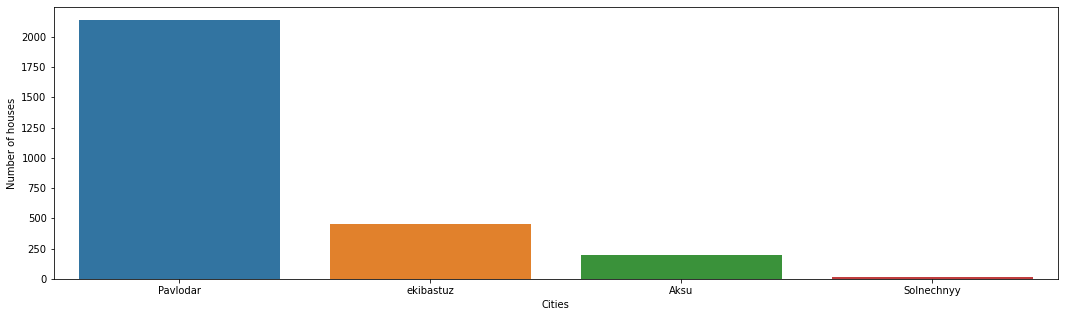

In [9]:
house_city  = df['city'].value_counts().to_frame()
house_city = house_city[house_city['city'] >= 7]
plt.figure(figsize=(18, 5))
sns.barplot(x = house_city.index , y = 'city' ,data = house_city)
plt.xlabel('Cities')
plt.ylabel('Number of houses')
plt.show()

In this graph we can see that most houses dask are from Pavlodar
So let's check by streets

In [19]:
df_pav = df.loc[df['city'] == 'Pavlodar']
print(len(df_pav))
df_pav

2139


,Unnamed: 0,price,rooms,sectionAlias,square,title,city,country,house_num,region,street,addedAt,phone,link
0,0,16500000,2,prodazha,52.5,"2-комнатная квартира, 52.5 м², 6/9 этаж",Pavlodar,Kazahstan,7/1,Pavlodarskaya_obl_,Astana,2021-01-23,+7 707 961 6030,https://krisha.kz/a/show/664548087
1,1,10700000,3,prodazha,60.0,"3-комнатная квартира, 60 м², 5/5 этаж",Pavlodar,Kazahstan,24,Pavlodarskaya_obl_,Gagarina,2021-01-23,+7 778 344 4191,https://krisha.kz/a/show/664505445
2,2,7500000,1,prodazha,34.0,"1-комнатная квартира, 34 м², 9/9 этаж",Pavlodar,Kazahstan,90,Pavlodarskaya_obl_,Tolstogo,2021-01-23,+7 702 603 2348,https://krisha.kz/a/show/664571582
4,4,27000000,4,prodazha,105.0,"4-комнатная квартира, 105 м², 4/10 этаж",Pavlodar,Kazahstan,280,Pavlodarskaya_obl_,1_maya,2021-01-25,+7 705 457 9100,https://krisha.kz/a/show/662169384
5,5,18800000,3,prodazha,65.0,"3-комнатная квартира, 65 м², 3/9 этаж",Pavlodar,Kazahstan,68,Pavlodarskaya_obl_,Kamzina,2021-01-25,+7 776 849 6595,https://krisha.kz/a/show/664630869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2821,9000000,1,prodazha,32.9,"1-комнатная квартира, 32.9 м², 1/9 этаж",Pavlodar,Kazahstan,140,Pavlodarskaya_obl_,Estaya,2021-01-18,+7 707 836 8320,https://krisha.kz/a/show/28801836
2822,2822,22500000,3,prodazha,69.0,"3-комнатная квартира, 69 м², 2/9 этаж",Pavlodar,Kazahstan,99,Pavlodarskaya_obl_,Margulana,2021-01-18,+7 707 605 6699,https://krisha.kz/a/show/664498266
2823,2823,13500000,2,prodazha,50.0,"2-комнатная квартира, 50 м², 3/9 этаж",Pavlodar,Kazahstan,25,Pavlodarskaya_obl_,Chokina,2021-01-18,+7 701 401 8186,https://krisha.kz/a/show/664497696
2825,2825,16500000,3,prodazha,70.0,"3-комнатная квартира, 70 м², 3/9 этаж",Pavlodar,Kazahstan,41,Pavlodarskaya_obl_,Gorykogo,2021-01-18,+7 701 401 8186,https://krisha.kz/a/show/664497517


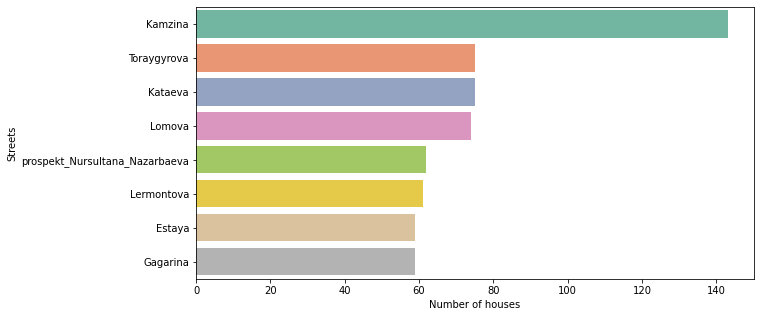

In [29]:
house_street  = df_pav['street'].value_counts().to_frame()
house_street = house_street[house_street['street'] >= 50]
plt.figure(figsize=(10, 5))
sns.barplot(y = house_street.index , x = 'street' ,data = house_street ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of houses')
plt.ylabel('Streets')
plt.show()


So why in Kamzina the most houses in sales:


*   The most new houses
*   



In [31]:
df_aksu = df.loc[df['city'] == 'Aksu']
df_aksu

,Unnamed: 0,price,rooms,sectionAlias,square,title,city,country,house_num,region,street,addedAt,phone,link
46,46,9200000,2,prodazha,49.8,"2-комнатная квартира, 49.8 м², 2/5 этаж",Aksu,Kazahstan,47,Pavlodarskaya_obl_,10mkr_,2021-01-24,+7 747 428 7704,https://krisha.kz/a/show/664244369
58,58,3400000,1,prodazha,36.0,"1-комнатная квартира, 36 м², 1/5 этаж",Aksu,Kazahstan,13,Pavlodarskaya_obl_,Bauyrzhan_Momushulu,2021-01-25,+7 707 431 7105,https://krisha.kz/a/show/664636604
72,72,11000000,3,prodazha,63.6,"3-комнатная квартира, 63.6 м², 6/6 этаж",Aksu,Kazahstan,39,Pavlodarskaya_obl_,4-y_mikrorayon,2021-01-25,+7 777 498 1652,https://krisha.kz/a/show/663502221
131,131,9000000,3,prodazha,62.0,"3-комнатная квартира, 62 м², 3/5 этаж",Aksu,Kazahstan,16,Pavlodarskaya_obl_,Manshuk_Mametovoy,2021-01-25,+7 705 731 2155,https://krisha.kz/a/show/51219197
146,146,5200000,1,prodazha,33.1,"1-комнатная квартира, 33.1 м², 7/9 этаж",Aksu,Kazahstan,55,Pavlodarskaya_obl_,ulitsa_Lenina,2021-01-25,+7 771 370 8511,https://krisha.kz/a/show/54262597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2749,6800000,2,prodazha,51.1,"2-комнатная квартира, 51.1 м², 4/4 этаж",Aksu,Kazahstan,10,Pavlodarskaya_obl_,Zheleznodorozhnaya,2021-01-18,+7 747 413 6486,https://krisha.kz/a/show/663926163
2781,2781,7000000,3,prodazha,59.0,"3-комнатная квартира, 59 м², 5/5 этаж",Aksu,Kazahstan,14,Pavlodarskaya_obl_,Astana,2021-01-18,+7 705 708 3560,https://krisha.kz/a/show/664212328
2798,2798,7500000,3,prodazha,64.0,"3-комнатная квартира, 64 м², 3/5 этаж",Aksu,Kazahstan,26,Pavlodarskaya_obl_,ulitsa_Kamzina,2021-01-25,+7 747 538 6200,https://krisha.kz/a/show/664496153
2804,2804,7500000,3,prodazha,64.5,"3-комнатная квартира, 64.5 м², 3/5 этаж",Aksu,Kazahstan,26,Pavlodarskaya_obl_,Kamzina,2021-01-25,+7 747 386 6400,https://krisha.kz/a/show/664496207


In [32]:
df_ekb = df.loc[df['city'] == 'ekibastuz']
df_ekb

,Unnamed: 0,price,rooms,sectionAlias,square,title,city,country,house_num,region,street,addedAt,phone,link
3,3,8000000,3,prodazha,59.0,"3-комнатная квартира, 59 м², 4/5 этаж",ekibastuz,Kazahstan,44a,Pavlodarskaya_obl_,energetikov,2021-01-25,+7 775 222 2489,https://krisha.kz/a/show/55117056
14,14,10700000,3,prodazha,66.0,"3-комнатная квартира, 66 м², 1/5 этаж",ekibastuz,Kazahstan,67/1,Pavlodarskaya_obl_,Satpaeva,2021-01-25,+7 701 169 0909,https://krisha.kz/a/show/52216171
24,24,9000000,3,prodazha,64.0,"3-комнатная квартира, 64 м², 5/5 этаж",ekibastuz,Kazahstan,99-38,Pavlodarskaya_obl_,ul__Stroitelynaya,2021-01-25,+7 777 935 3091,https://krisha.kz/a/show/662575734
37,37,7200000,2,prodazha,51.9,"2-комнатная квартира, 51.9 м², 5/6 этаж",ekibastuz,Kazahstan,3,Pavlodarskaya_obl_,Shakarim,2021-01-24,+7 705 584 6606,https://krisha.kz/a/show/660842796
75,75,8260000,3,prodazha,67.0,"3-комнатная квартира, 67 м², 5/5 этаж",ekibastuz,Kazahstan,190_A,Pavlodarskaya_obl_,Berkimbaeva,2021-01-25,+7 775 162 8825,https://krisha.kz/a/show/52440438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2805,17000000,4,prodazha,82.4,"4-комнатная квартира, 82.4 м², 1/9 этаж",ekibastuz,Kazahstan,11,Pavlodarskaya_obl_,Sheshembekova,2021-01-25,+7 707 230 3945,https://krisha.kz/a/show/52637477
2806,2806,10500000,4,prodazha,75.0,"4-комнатная квартира, 75 м², 5/5 этаж",ekibastuz,Kazahstan,88,Pavlodarskaya_obl_,Koroleva,2021-01-25,+7 707 997 9080,https://krisha.kz/a/show/58313110
2807,2807,7000000,2,prodazha,44.0,"2-комнатная квартира, 44 м², 2/5 этаж",ekibastuz,Kazahstan,94,Pavlodarskaya_obl_,20-y_mikrorayon,2021-01-25,+7 702 338 2641,https://krisha.kz/a/show/662947828
2809,2809,19000000,3,prodazha,83.0,"3-комнатная квартира, 83 м², 1/3 этаж",ekibastuz,Kazahstan,54,Pavlodarskaya_obl_,Kunaeva,2021-01-25,+7 701 212 7333,https://krisha.kz/a/show/660299082


Average square of house in Pavlodar  61.69038803179059


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



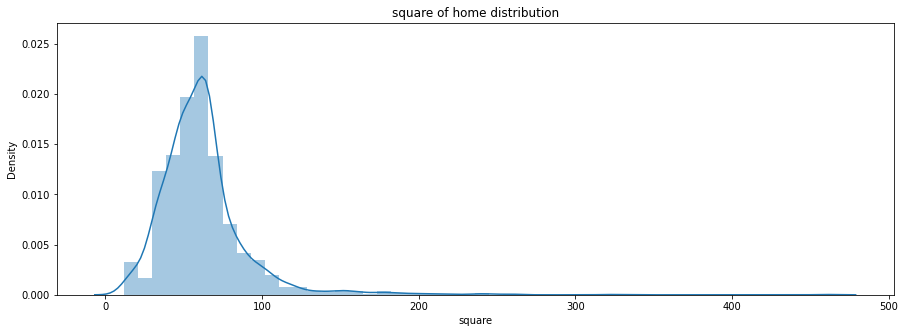

In [36]:
print("Average square of house in Pavlodar ", df_pav['square'].mean())


plt.figure(figsize=(15, 5))
sns.distplot(df_pav['square'])
plt.xlabel('square')
plt.title('square of home distribution')
plt.show()

Average square of house in Ekibastuz  59.11447368421053


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



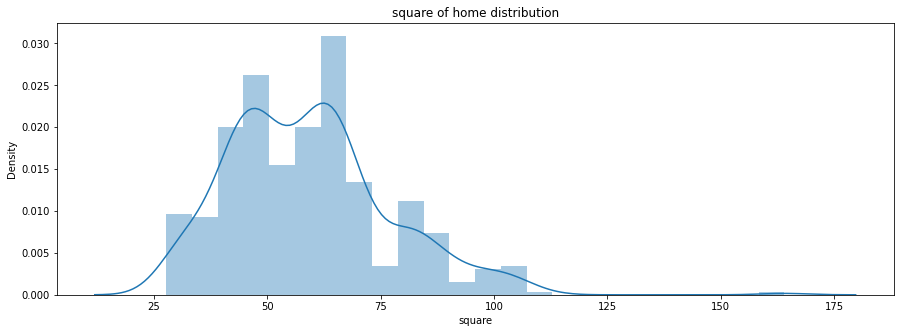

In [41]:
print("Average square of house in Ekibastuz ", df_ekb['square'].mean())


plt.figure(figsize=(15, 5))
sns.distplot(df_ekb['square'])
plt.xlabel('square')
plt.title('square of home distribution')
plt.show()

Average square of house in Aksu  58.83298969072164


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



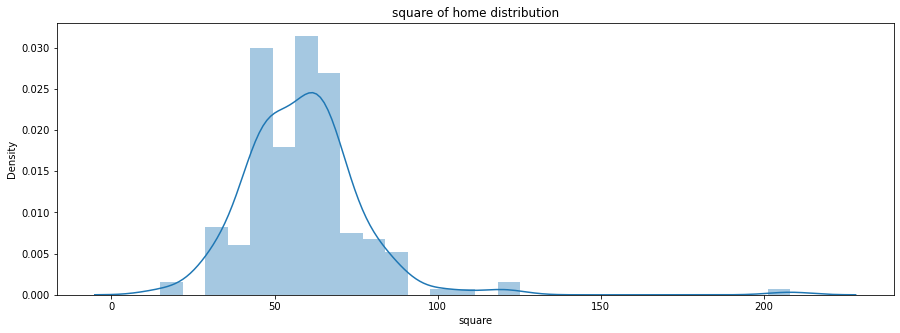

In [40]:
print("Average square of house in Aksu ", df_aksu['square'].mean())


plt.figure(figsize=(15, 5))
sns.distplot(df_aksu['square'])
plt.xlabel('square')
plt.title('square of home distribution')
plt.show()

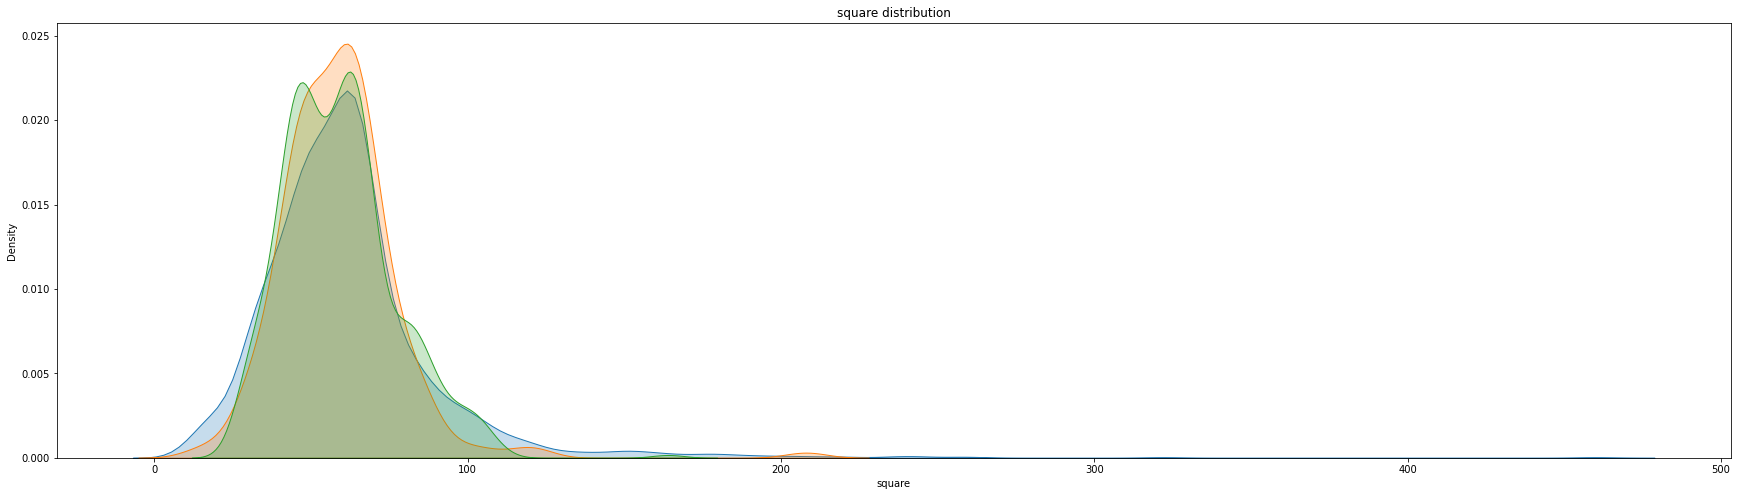

In [50]:

plt.figure(figsize=(30, 8))
sns.kdeplot(df.square[df.city == 'Pavlodar'], label='Pavlodar', shade=True)
sns.kdeplot(df.square[df.city == 'Aksu'], label='Aksu', shade=True)
sns.kdeplot(df.square[df.city == 'ekibastuz'], label='Ekibastuz', shade=True)

plt.xlabel('square')
plt.title('square distribution')
plt.show()

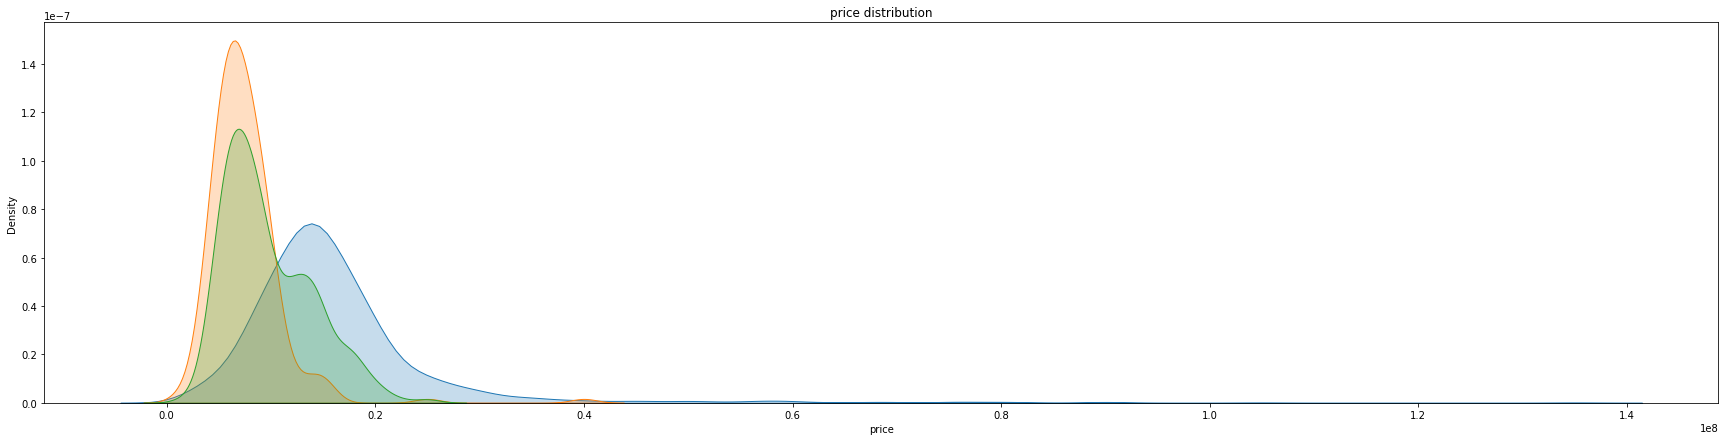

In [66]:
plt.figure(figsize=(30, 7))
sns.kdeplot(df.price[df.city == 'Pavlodar'], label='Pavlodar', shade=True)
sns.kdeplot(df.price[df.city == 'Aksu'], label='Aksu', shade=True)
sns.kdeplot(df.price[df.city == 'ekibastuz'], label='Ekibastuz', shade=True)

plt.xlabel('price')
plt.title('price distribution')
plt.show()

Average square of house in Pavlodar  16161238.011687705


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



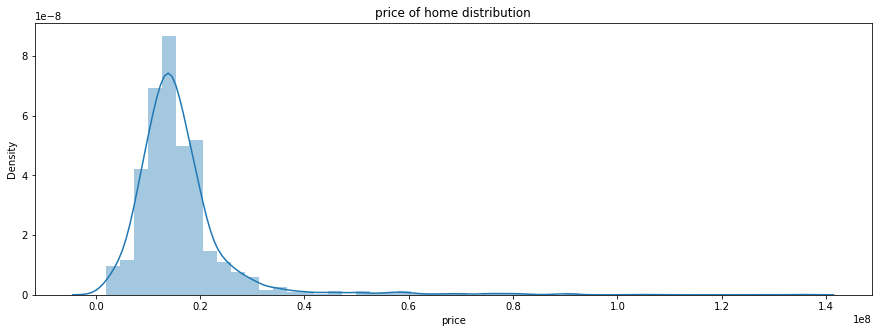

In [53]:
print("Average square of house in Pavlodar ", df_pav['price'].mean())


plt.figure(figsize=(15, 5))
sns.distplot(df_pav['price'])
plt.xlabel('price')
plt.title('price of home distribution')
plt.show()

Average square of house in Ekibastuz  9696450.682017544


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



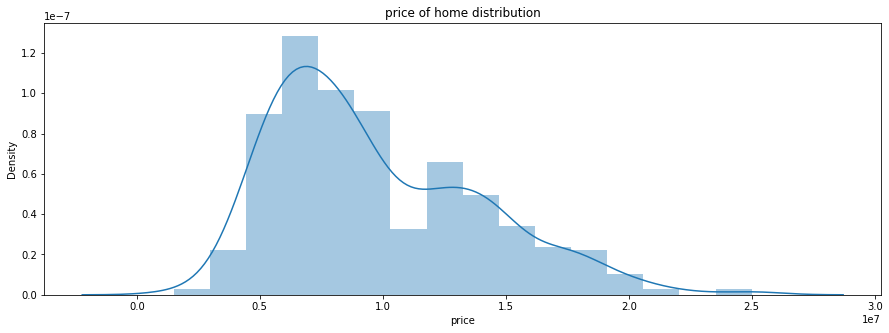

In [54]:
print("Average square of house in Ekibastuz ", df_ekb['price'].mean())


plt.figure(figsize=(15, 5))
sns.distplot(df_ekb['price'])
plt.xlabel('price')
plt.title('price of home distribution')
plt.show()

Average square of house in Aksu  7480452.458762887


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



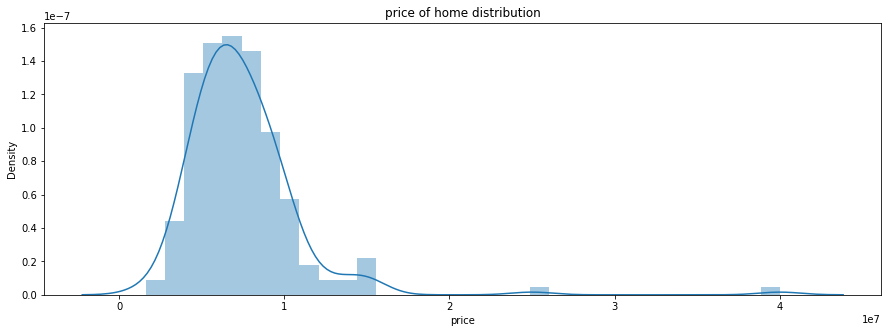

In [56]:
print("Average square of house in Aksu ", df_aksu['price'].mean())


plt.figure(figsize=(15, 5))
sns.distplot(df_aksu['price'])
plt.xlabel('price')
plt.title('price of home distribution')
plt.show()

In [59]:

date_pav = df_pav.groupby('rooms')['price'].mean().to_frame()
date_pav.columns = ['mean']
date_pav.reset_index(inplace=True)
date_pav

,rooms,mean
0,1,8.337824e+06
1,2,1.367863e+07
2,3,1.785305e+07
3,4,2.475782e+07
4,5,2.911977e+07
5,6,5.228571e+07
6,7,5.533333e+07


In [61]:
date_pav = df_pav.groupby('rooms')['square'].mean().to_frame()

date_pav.columns = ['mean']
date_pav.reset_index(inplace=True)
date_pav

,rooms,mean
0,1,32.199404
1,2,52.138884
2,3,68.031308
3,4,91.696581
4,5,119.871014
5,6,157.314286
6,7,327.666667


# Conclusion 
from these statistics, we see that in each region the area of houses is not greatly recovered, but at the same time in three large cities the prices for them are different
and we also see that the average price for a room is not proportional to the number of rooms
and we also see that many houses are being sold in Pavlodar on Kamzin street and the reason for this may be that there are more new houses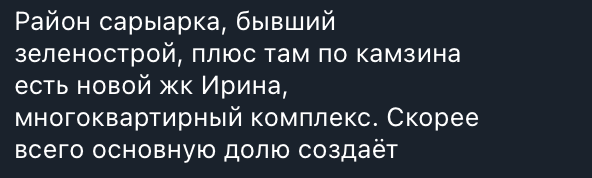

In [79]:
pav_price = sorted(list(df_pav['price']))
print(pav_price)


[2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2500000, 2500000, 2800000, 3000000, 3000000, 3000000, 3000000, 3000000, 3000000, 3000000, 3200000, 3200000, 3200000, 3200000, 3200000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000, 3600000, 3700000, 3750000, 3800000, 4000000, 4000000, 4000000, 4000000, 4000000, 4000000, 4000000, 4000000, 4000000, 4200000, 4200000, 4200000, 4300000, 4300000, 4500000, 4500000, 4500000, 4500000, 4500000, 4500000, 4500000, 4500000, 4600000, 4900000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5000000, 5100000, 5100000, 5200000, 5200000, 5200000, 5500000, 5500000, 5500000, 5500000, 5500000, 5500000, 5700000, 5900000, 6000000, 6000000, 6000000, 6100000, 6300000, 6300000, 6400000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6700000, 6800000, 6800000, 6800000, 6800000, 6800000, 7000000, 7000000, 7000000, 7000000, 7000000, 7000000, 7000000, 7000000, 7000000, 7000000, 

In [81]:
by_room = {}
for i in range(1,8):
    by_room[i] = sorted(list(df_pav.groupby(["rooms"]).get_group(i)['price']))

pprint(by_room)

{1: [2000000,
     2100000,
     2200000,
     2300000,
     2400000,
     2500000,
     2500000,
     2500000,
     2800000,
     3000000,
     3000000,
     3000000,
     3000000,
     3000000,
     3000000,
     3000000,
     3200000,
     3200000,
     3200000,
     3200000,
     3200000,
     3500000,
     3500000,
     3500000,
     3500000,
     3500000,
     3500000,
     3600000,
     3700000,
     3750000,
     3800000,
     4000000,
     4000000,
     4000000,
     4000000,
     4000000,
     4000000,
     4000000,
     4000000,
     4200000,
     4200000,
     4300000,
     4500000,
     4500000,
     4500000,
     4500000,
     4500000,
     4500000,
     4500000,
     4500000,
     4600000,
     4900000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5000000,
     5100000,
     5100000,
     5200000,
     5200000,
     5500000,
     5500000,
     5500000,
     5

In [91]:
by_room_area = {}
for i in range(1,8):
    by_room_area[i] = sorted(list(df_pav.groupby(["rooms"]).get_group(i)['square']))

pprint(by_room_area)

{1: [12.0,
     12.0,
     13.0,
     13.0,
     13.1,
     13.2,
     13.4,
     14.0,
     14.0,
     14.0,
     14.0,
     14.0,
     14.0,
     15.0,
     15.0,
     16.0,
     16.3,
     17.0,
     17.0,
     17.0,
     17.0,
     17.0,
     17.3,
     17.4,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.0,
     18.6,
     18.7,
     18.9,
     19.0,
     19.0,
     19.0,
     19.2,
     19.2,
     19.2,
     19.5,
     20.0,
     20.0,
     20.0,
     20.0,
     20.0,
     20.0,
     20.3,
     20.5,
     20.8,
     21.0,
     21.3,
     22.0,
     22.0,
     22.2,
     22.5,
     23.0,
     23.0,
     23.37,
     23.8,
     24.0,
     25.0,
     26.0,
     26.3,
     26.7,
     27.0,
     27.0,
     28.0,
     28.0,
     28.0,
     28.0,
     28.3,
     28.4,
     28.8,
     29.0,
     29.0,
     29.0,
     29.4,
     29.5

In [82]:
def binary_search(arr, x): 
    low = 0
    high = len(arr) - 1
    mid = 0
  
    while low <= high: 
  
        mid = (high + low) // 2
  
        if arr[mid] < x: 
            low = mid + 1
  
        elif arr[mid] > x: 
            high = mid - 1
  
        else: 
            return mid 
  
    return -1

In [85]:
! pip install pytelegrambotapi

     |████████████████████████████████| 81kB 4.6MB/s 
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-3.7.6-cp36-none-any.whl size=59261 sha256=558ae606b8af41e43cf25db8689515894f5733d2e996d62c4d02d9a2caaf1ebf
  Stored in directory: /root/.cache/pip/wheels/f6/66/6e/d42e8fcb446d2683b5afe0b23318f4bb58896bad26549c47b9
Successfully built pytelegrambotapi


In [97]:
import telebot

API_TOKEN = '1598628189:AAEzktiabA3O__fLF1sx03JH7cMVZef_0qQ'

bot = telebot.TeleBot(API_TOKEN)

@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, """Hello
please send me a url of home that you want in PAVLODAR and i will send you information about this home
""")

    


@bot.message_handler(func=lambda message: True)
def echo_message(message):
    url = message.text
    newdf = df.loc[df['link'] == url]
    room = int(newdf['rooms'])
    price = int(newdf['price'])
    area = int(newdf['square'])
    percent_area = (binary_search(by_room_area[room],area))/len(by_room_area[room])
    percent = (binary_search(by_room[room],price))/len(by_room[room])
    bot.reply_to(message, 'this home is expensive ' + str(percent * 100) + ' % ' + 'of ' + str(room) + ' roomed home in Pavlodar')
    bot.reply_to(message, 'this home is bigger ' + str(percent_area * 100) + ' % ' + 'of ' + str(room) + ' roomed home in Pavlodar')


bot.polling()